# Project 1: Polynomial Regression Model

1\. Build Polynomial Regression Models 
* Use closed form solution to estimate parameters
* Use packages of choice to estimate parameters<br>

2\. Model Performance Assessment
* Provide an analytical rationale with choice of model
* Visualize the Model performance
  * MSE, R-Squared, Train and Test Error <br>

3\. Model Interpretation

* Intepret the results of your model
* Intepret the model assement <br>
    
4\. Model Dianostics
* Does the model meet the regression assumptions
    
#### About this Notebook

1\. The dataset used is the housing dataset from Seattle homes
2\. Online resources we're used to aid in development and analysis 

Let's get started.

### Packages

Importing the necessary packages for the analysis

In [1]:
%matplotlib inline
# Necessary Packages
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Model and data preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

The dataset provided is a titled *housing_data.csv* and contains housing prices and information about the features of the houses. Below, read the data into a variable and visualize the top 8 rows of the data.  

In [2]:
# Initiliazing seed
np.random.seed(42)

data = pd.read_csv('housing_data.csv')
data.dropna(inplace=True)

In [3]:
df = pd.DataFrame(data)
df.head(5)

,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
0,8450,856,1710,2,548,208500
1,9600,1262,1262,2,460,181500
2,11250,920,1786,2,608,223500
3,9550,961,1717,1,642,140000
4,14260,1145,2198,2,836,250000


In [4]:
df.shape

(1460, 6)

### Split data into train and test

In the code below, we need to split the data into the train and test for modeling and validation of our models. We will cover the Train/Validation/Test as we go along in the project. Fill the following code.

1\. Subset the features to the variable: features <br>
2\. Subset the target variable: target <br>
3\. Set the test size in proportion in to a variable: test_size <br>


In [5]:
X = df.drop(['price'], axis=1)
# df.iloc[:, 0:5]
y = df.drop(['lot_area', 'firstfloor_sqft', 'living_area', 'bath', 'garage_area'], axis=1)
# df.iloc[:, 5:6] 
test_size = .33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

### Feature Assessment

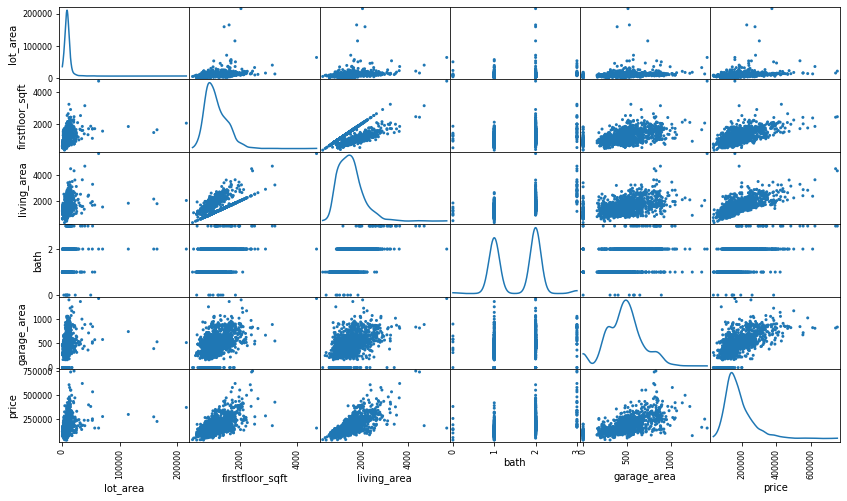

In [6]:
features = pd.plotting.scatter_matrix(data, figsize=(14,8), alpha=1, diagonal='kde')

In [7]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
lot_area,1.0,0.3,0.26,0.13,0.18,0.26
firstfloor_sqft,0.3,1.0,0.57,0.38,0.49,0.61
living_area,0.26,0.57,1.0,0.63,0.47,0.71
bath,0.13,0.38,0.63,1.0,0.41,0.56
garage_area,0.18,0.49,0.47,0.41,1.0,0.62
price,0.26,0.61,0.71,0.56,0.62,1.0


In [8]:
# Pass the necessary arguments in the function to calculate the coefficients
def compute_estimators(feature, target):
    n1 = np.sum(feature*target) - np.mean(target)*np.sum(feature)
    d1 = np.sum(feature*feature) - np.mean(feature)*np.sum(feature)
    
    # Compute the Intercept and Slope
    beta1 = n1/d1
    beta0 = np.mean(target) - beta1*np.mean(feature)
    
    return beta0, beta1 # Return the Intercept and Slope
# Remember to pass the correct arguments
count = 0
for x in X_train:
    x = X_train.iloc[:, count]
    beta0, beta1 = compute_estimators(x, y_train['price'])
    print(x.name, "beta0:", beta0)
    print(x.name, "beta1:", beta1, "\n")
    count += 1

lot_area beta0: 162058.26514087673
lot_area beta1: 1.7674592921709562 

firstfloor_sqft beta0: 47919.74369563273
firstfloor_sqft beta1: 113.99204905891604 

living_area beta0: 30774.037736162165
living_area beta1: 98.50395317263077 

bath beta0: 61380.32379258756
bath beta1: 75603.33677703448 

garage_area beta0: 72754.55457258347
garage_area beta1: 226.93274858049327 



In [9]:
# Initilize the linear Regression model here
regression = LinearRegression()

count = 0
for x in X_train:
    x = X_train.iloc[:, count]
    regression.fit(x.values.reshape(-1, 1),  y_train['price'])
    print(x.name, "beta0:", regression.intercept_)
    print(x.name, "beta1:", regression.coef_, "\n")
    count += 1

lot_area beta0: 162058.26514087676
lot_area beta1: [1.76745929] 

firstfloor_sqft beta0: 47919.743695632584
firstfloor_sqft beta1: [113.99204906] 

living_area beta0: 30774.037736162078
living_area beta1: [98.50395317] 

bath beta0: 61380.32379258756
bath beta1: [75603.33677703] 

garage_area beta0: 72754.55457258345
garage_area beta1: [226.93274858] 



In [10]:
#Function used to plot the data
def plotting_model(feature, target, predictions, name):
    """ Create a scatter and predictions  """
    fig = plt.figure(figsize=(10,8)) 
    plot_model = regression.fit(feature, target)
    plt.scatter(x=feature, y=target, color='blue')
    plt.plot(feature, predictions, color='red')
    plt.xlabel(name)
    plt.ylabel('Price')

    return regression

In [11]:
#Function that computes predictions of our model using the betas above + the feature data we've been using 
def model_predictions(intercept, slope, feature):
    """ Compute Model Predictions """
    y_hat = (slope*feature)+intercept
    
    return y_hat

#Function to compute MSE which determines the total loss for each predicted data point in our model
def mean_square_error(y_outcome, predictions):
    """ Compute the mean square error """
    mse = (np.sum((y_outcome - predictions) ** 2))/np.size(predictions)
    
    return mse

lot_area
beta0: 162058.26514087673
beta1: 1.7674592921709562
mean squared error: 5380086184.229674

firstfloor_sqft
beta0: 47919.74369563273
beta1: 113.99204905891604
mean squared error: 3828958671.161073

living_area
beta0: 30774.037736162165
beta1: 98.50395317263077
mean squared error: 3141468544.5197167

bath
beta0: 61380.32379258756
beta1: 75603.33677703448
mean squared error: 4103175254.888641

garage_area
beta0: 72754.55457258347
beta1: 226.93274858049327
mean squared error: 3526080223.9233127



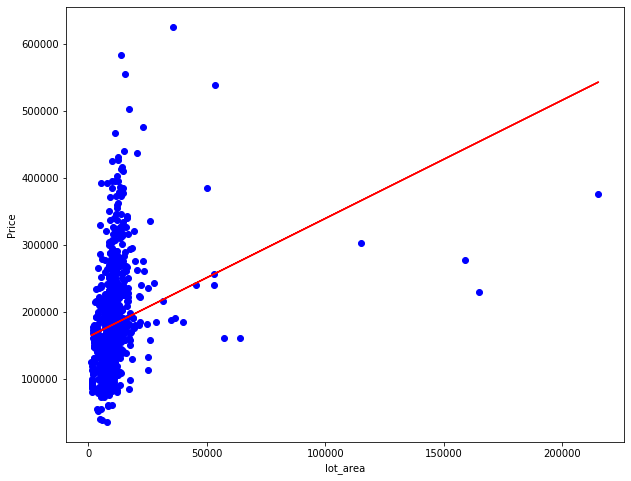

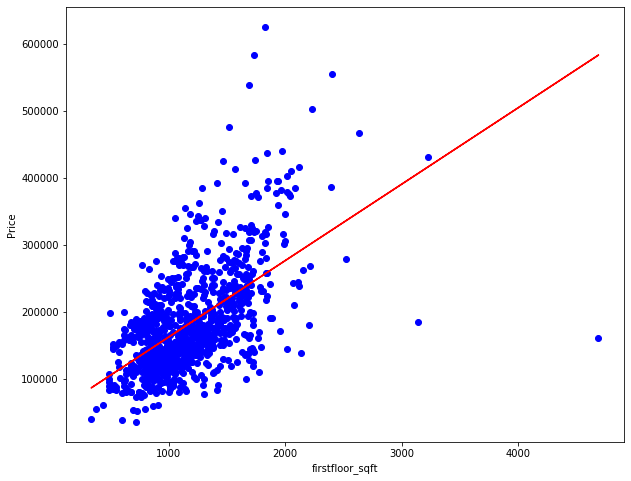

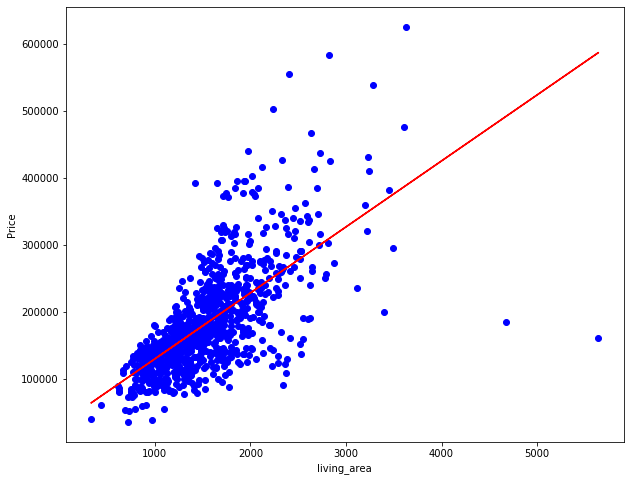

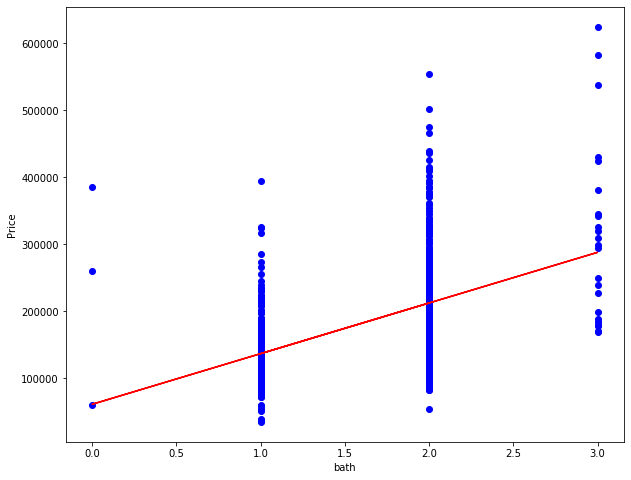

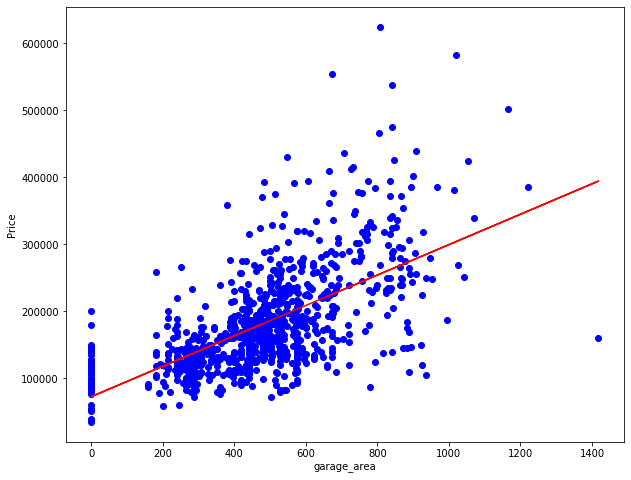

In [12]:
count = 0

for x in X_train:
    x = X_train.iloc[:, count]
    # Compute the Coefficients
    beta0, beta1 = compute_estimators(x, y_train['price'])
    
    # Print the Intercept and Slope
    print(x.name)
    print('beta0:', beta0)
    print('beta1:', beta1)

    # Compute the Train and Test Predictions
    y_hat = model_predictions(beta0, beta1, x)

    # Plot the Model Scatter  
    name = x.name
    regression = plotting_model(x.values.reshape(-1, 1), y_train, y_hat, name)
    
    # Compute the MSE
    mse = mean_square_error(y['price'], y_hat)
    print('mean squared error:', mse)
    print()
    count+=1
    

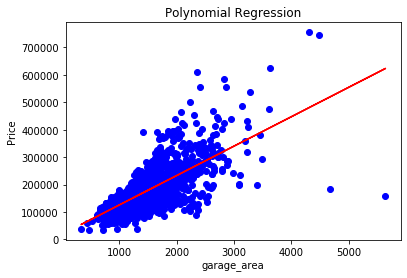

In [13]:
# PolynomialFeatures (prepreprocessing)
count = 0

# for x in X_train:
#     x = X_train.iloc[:, count]
X = X['living_area'].values.reshape(-1, 1)
polynomial_regression = PolynomialFeatures(degree=3)
x_poly = polynomial_regression.fit_transform(X)
poly_regression = regression.fit(x_poly, y)
plt.scatter(X, y, color='blue')
plt.plot(X, poly_regression.predict(polynomial_regression.fit_transform(X)), color='red')
plt.title('Polynomial Regression')
plt.xlabel(x.name)
plt.ylabel('Price')
plt.show()
# count += 1